In [88]:
from dowhy import CausalModel
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import dowhy
import dowhy.datasets, dowhy.plotter
import did

In [120]:
from matplotlib import font_manager, rc
font_path = "data/서울한강 장체L.ttf"   #폰트파일의 위치
font_name = font_manager.FontProperties(fname=font_path).get_name()
print(font_name)
rc('font', family=font_name)
river = pd.read_excel("fulldata.xlsx")
print(river.shape)
river.head()

SeoulHangangC
(270, 32)


,측정소명,연도,연도더미,2015,2016,2017,2018,2019,2020,미세먼지,...,최고기온,평균최저기온,최고기온 나타난날,최저기온,최저기온나타난날,평균풍속,최대순간풍속,최대순간풍속풍향,최대순간풍속나타난날,강수량합
0,강남구(삼성2동),2015,1,1,0,0,0,0,0,45.572411,...,35.5,10.6,20150711.0,-11.1,20150208.0,1.7,18.1,NaN,20150603.0,818.0
1,강남구(삼성2동),2016,2,0,1,0,0,0,0,51.029344,...,36.4,10.8,20160805.0,-16.5,20160124.0,1.7,16.5,295.3,20160504.0,1005.5
2,강남구(삼성2동),2017,0,0,0,1,0,0,0,43.959616,...,37.2,10.0,20170805.0,-11.3,20171212.0,1.7,21.9,NaN,20171219.0,1246.0
3,강남구(삼성2동),2018,3,0,0,0,1,0,0,34.949233,...,40.0,10.0,20180801.0,-17.0,20180126.0,1.6,16.1,208.1,20180410.0,1312.5
4,강남구(삼성2동),2019,4,0,0,0,0,1,0,39.290712,...,37.7,NaN,20190806.0,-9.6,20191231.0,NaN,13.3,222.2,20190330.0,981.5


In [ ]:
def month_to_season(x):
    if x in [3,4,5]:
        y = "spring"
    elif x in [6,7,8]:
        y = "summer"
    elif x in [9,10,11]:
        y = "autumn"
    else:
        y = "winter"
    return (y)

def weather(x):
    if   x==1:
        y = "clear"
    elif x==2:
        y = "cloudy"
    elif x==3:
        y = "light_rainy"
    else:
        y = "heavy_rainy"
    return (y)

In [121]:
# 1. 원핫 인코딩 생성
year_dummies = pd.get_dummies(river['연도'])
restore_dummies= pd.get_dummies(river['1km내복원하천여부'])
river = pd.concat([river,year_dummies,restore_dummies],axis=1)
list(river)

['측정소명',
 '연도',
 '연도더미',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 '미세먼지',
 '주거밀집도',
 '소매',
 '음식',
 '생활서비스',
 '합계 범위',
 '교통량',
 '1km내복원하천여부',
 '총녹지면적',
 '복원하천면적',
 '녹지면적합계',
 '평균기온',
 '평균최고기온',
 '최고기온',
 '평균최저기온',
 '최고기온 나타난날',
 '최저기온',
 '최저기온나타난날',
 '평균풍속',
 '최대순간풍속',
 '최대순간풍속풍향',
 '최대순간풍속나타난날',
 '강수량합',
 2015,
 2016,
 2017,
 2018,
 2019,
 2020,
 0,
 1]

[Text(0.5, 1.0, '관측소별 녹지면적')]

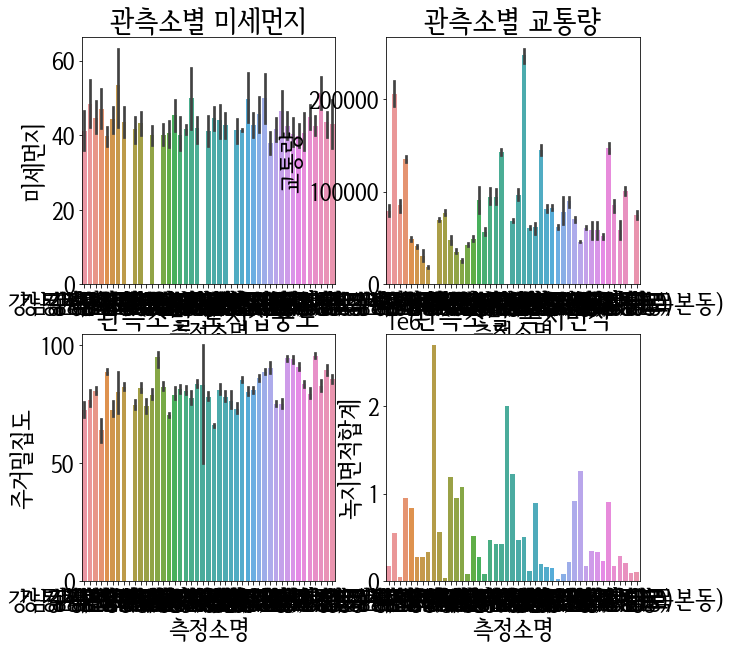

In [123]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(10,10)
sns.barplot(x="측정소명",y="미세먼지", data = river,ax=ax1)
sns.barplot(x="측정소명",y="교통량", data = river,ax=ax2)
sns.barplot(x="측정소명",y="주거밀집도", data = river,ax=ax3)
sns.barplot(x="측정소명",y="녹지면적합계", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

[Text(0.5, 1.0, '관측소별 녹지면적')]

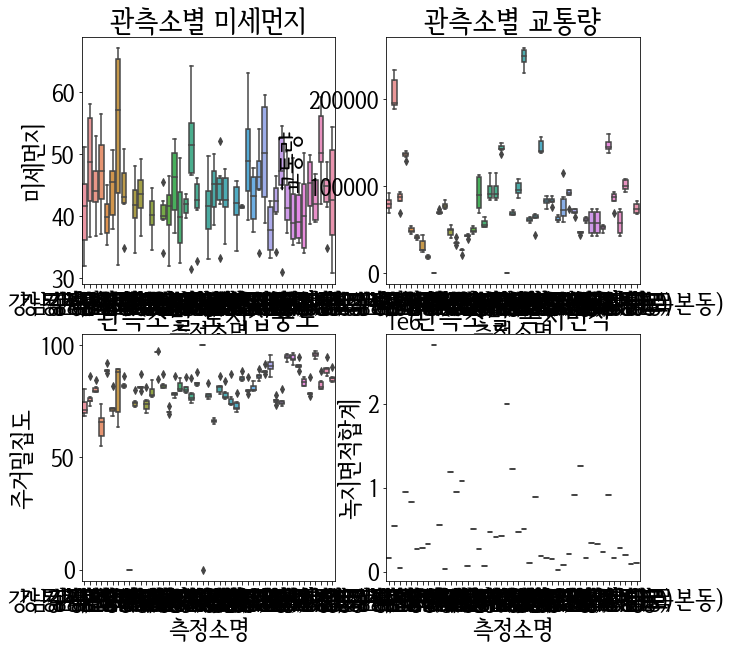

In [124]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)
fig.set_size_inches(10,10)

sns.boxplot(x="측정소명",y="미세먼지", data = river,ax=ax1)
sns.boxplot(x="측정소명",y="교통량", data = river,ax=ax2)
sns.boxplot(x="측정소명",y="주거밀집도", data = river,ax=ax3)
sns.boxplot(x="측정소명",y="녹지면적합계", data = river,ax=ax4)
ax1.set(title = "관측소별 미세먼지")
ax2.set(title = "관측소별 교통량")
ax3.set(title = "관측소별 토지집중도")
ax4.set(title = "관측소별 녹지면적")

<AxesSubplot:xlabel='측정소명', ylabel='미세먼지'>

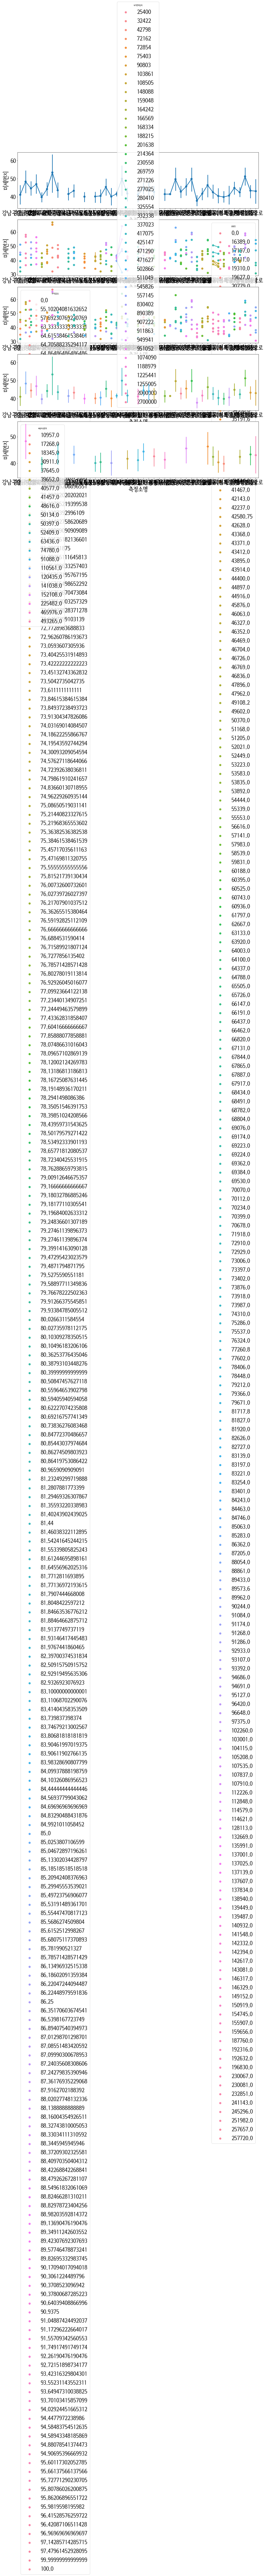

In [125]:
fig, (ax1,ax2,ax3,ax4,ax5) = plt.subplots(nrows=5)
fig.set_size_inches(18,25)

sns.pointplot(data=river,x="측정소명",y="미세먼지",ax=ax1)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="교통량",ax=ax2)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="주거밀집도",ax=ax3)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="녹지면적합계",ax=ax4)
sns.pointplot(data=river,x="측정소명",y="미세먼지",hue="복원하천면적",ax=ax5)

In [127]:
river["is_restore"]=river["1km내복원하천여부"].apply(lambda x: True if x == 1 else False)
river["is_river"]=river["복원하천면적"].apply(lambda x: True if x >0  else False)


In [143]:
river.dropna( inplace=True)
print(river)

     측정소명    연도  연도더미  2015  2016  2017  2018  2019  2020       미세먼지  ...  \
6    강남대로  2015     1     1     0     0     0     0     0  52.712329  ...   
7    강남대로  2016     2     0     1     0     0     0     0  58.081967  ...   
8    강남대로  2017     0     0     0     1     0     0     0  56.794521  ...   
9    강남대로  2018     3     0     0     0     1     0     0  44.780822  ...   
10   강남대로  2019     4     0     0     0     0     1     0  41.567123  ...   
..    ...   ...   ...   ...   ...   ...   ...   ...   ...        ...  ...   
264   화랑로  2015     1     1     0     0     0     0     0  47.052055  ...   
265   화랑로  2016     2     0     1     0     0     0     0  54.308743  ...   
267   화랑로  2018     3     0     0     0     1     0     0  36.553425  ...   
268   화랑로  2019     4     0     0     0     0     1     0  38.180822  ...   
269   화랑로  2020     5     0     0     0     0     0     1  30.762295  ...   

     2017  2018  2019  2020  0  1  is_restore  is_river  copay  restore  
6

In [144]:
river.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111 entries, 6 to 269
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   측정소명        111 non-null    object 
 1   연도          111 non-null    int64  
 2   연도더미        111 non-null    int64  
 3   2015        111 non-null    int64  
 4   2016        111 non-null    int64  
 5   2017        111 non-null    int64  
 6   2018        111 non-null    int64  
 7   2019        111 non-null    int64  
 8   2020        111 non-null    int64  
 9   미세먼지        111 non-null    float64
 10  주거밀집도       111 non-null    float64
 11  소매          111 non-null    int64  
 12  음식          111 non-null    int64  
 13  생활서비스       111 non-null    int64  
 14  합계 범위       111 non-null    int64  
 15  교통량         111 non-null    float64
 16  1km내복원하천여부  111 non-null    int64  
 17  총녹지면적       111 non-null    int64  
 18  복원하천면적      111 non-null    float64
 19  녹지면적합계      111 non-null    i

In [145]:
restore_effect = CausalModel(
    data=river,
    treatment = "is_restore",
    outcome = "미세먼지",
    common_causes = "교통량+주거밀집도+녹지면적합계+연도더미+평균기온+평균풍속+강수량합".split("+"),
    proceed_when_unidentifiable=True
)

In [146]:
restore_identified = restore_effect.identify_effect()

restore_matching = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_matching")
#restore_stratify = restore_effect.estimate_effect(restore_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(restore_matching.value))
#print("Causal Estimate of Stratification: {}".format(restore_stratify.value))

C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Causal Estimate of Matching: -0.1044862052710895


In [149]:
#모디파이어 고려(트리트먼트와 결과에 동시에 영향을 주는 요소)
mass_effect = CausalModel(
    data=river,
    treatment = "is_restore",
    outcome = "미세먼지",
    common_causes = "주거밀집도+연도더미+평균기온+평균풍속+강수량합".split("+"),
    effect_modifiers = "총녹지면적+교통량".split("+"),
    proceed_when_unidentifiable=True
)

In [150]:
mass_identified = mass_effect.identify_effect()

mass_matching = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_matching")
#mass_stratify = mass_effect.estimate_effect(mass_identified,method_name = "backdoor.propensity_score_stratification")

print("Causal Estimate of Matching: {}".format(mass_matching.value))
#print("Causal Estimate of Stratification: {}".format(mass_stratify.value))

C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Causal Estimate of Matching: -0.5363364995356937


In [151]:
# 1. 무관한 교란변수 생성
restore_random    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="random_common_cause")
# 2. 가짜 처리 생성
restore_placebo   = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="placebo_treatment_refuter", placebo_type="permute")
# 3. 일부만 추출(서브셋 변경할것)
restore_subset    = restore_effect.refute_estimate(restore_identified, restore_matching,method_name="data_subset_refuter", subset_fraction=0.8)

#restore_random_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="random_common_cause")
#restore_placebo_str   = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="placebo_treatment_refuter", placebo_type="permute")
#restore_subset_str    = restore_effect.refute_estimate(restore_identified, restore_stratify,method_name="data_subset_refuter", subset_fraction=0.8)

C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [153]:
print(restore_random)
print(restore_placebo)
print(restore_subset)

#print(restore_random_str)
#print(restore_placebo_str)
#print(restore_subset_str)

Refute: Add a Random Common Cause
Estimated effect:-0.1044862052710895
New effect:-0.1044862052710895

Refute: Use a Placebo Treatment
Estimated effect:-0.1044862052710895
New effect:0.4598040297899517
p value:0.44

Refute: Use a subset of data
Estimated effect:-0.1044862052710895
New effect:-0.2865161754773926
p value:0.35



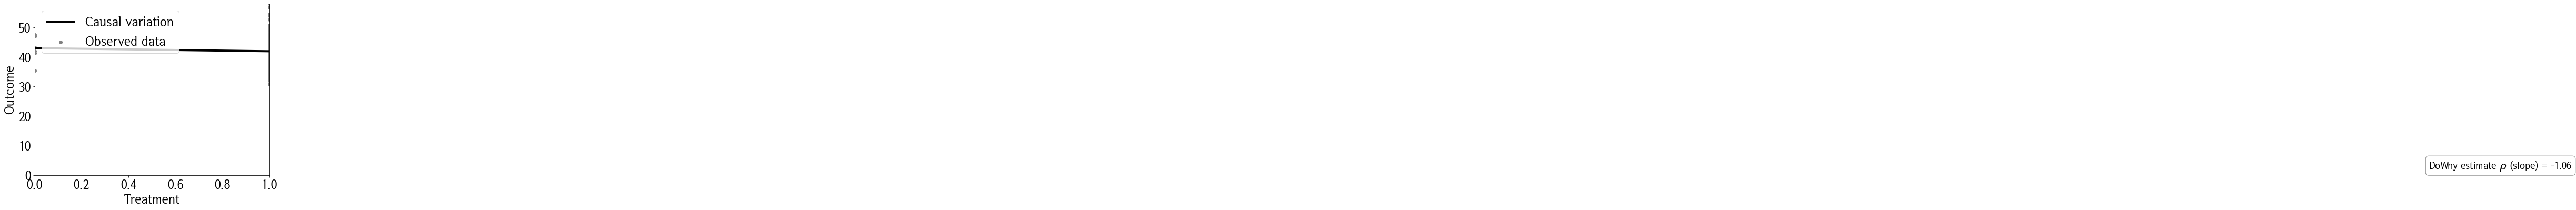

In [154]:
estimate = restore_effect.estimate_effect(restore_identified,
        method_name="backdoor.linear_regression")
# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, river["is_restore"], river["미세먼지"])

In [22]:
?dowhy

Type:        module
String form: <module 'dowhy' from 'C:\\YCL\\anaconda3\\envs\\pydatavenv\\lib\\site-packages\\dowhy\\__init__.py'>
File:        c:\ycl\anaconda3\envs\pydatavenv\lib\site-packages\dowhy\__init__.py
Docstring:   <no docstring>


In [155]:
# 1. 무관한 교란변수 생성
mass_random    = mass_effect.refute_estimate(mass_identified, mass_matching,method_name="random_common_cause")
# 2. 가짜 처리 생성
mass_placebo   = mass_effect.refute_estimate(mass_identified, mass_matching,method_name="placebo_treatment_refuter", placebo_type="permute")
# 3. 일부만 추출(서브셋 변경할것)
mass_subset    = mass_effect.refute_estimate(mass_identified, mass_matching,method_name="data_subset_refuter", subset_fraction=0.8)


C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\YCL\anaconda3\envs\pydatavenv\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

In [156]:
print(mass_random)
print(mass_placebo)
print(mass_subset)

Refute: Add a Random Common Cause
Estimated effect:-0.5363364995356937
New effect:-0.4393681197478773

Refute: Use a Placebo Treatment
Estimated effect:-0.5363364995356937
New effect:-0.5248547899887295
p value:0.48

Refute: Use a subset of data
Estimated effect:-0.5363364995356937
New effect:-0.8000272100027762
p value:0.42000000000000004



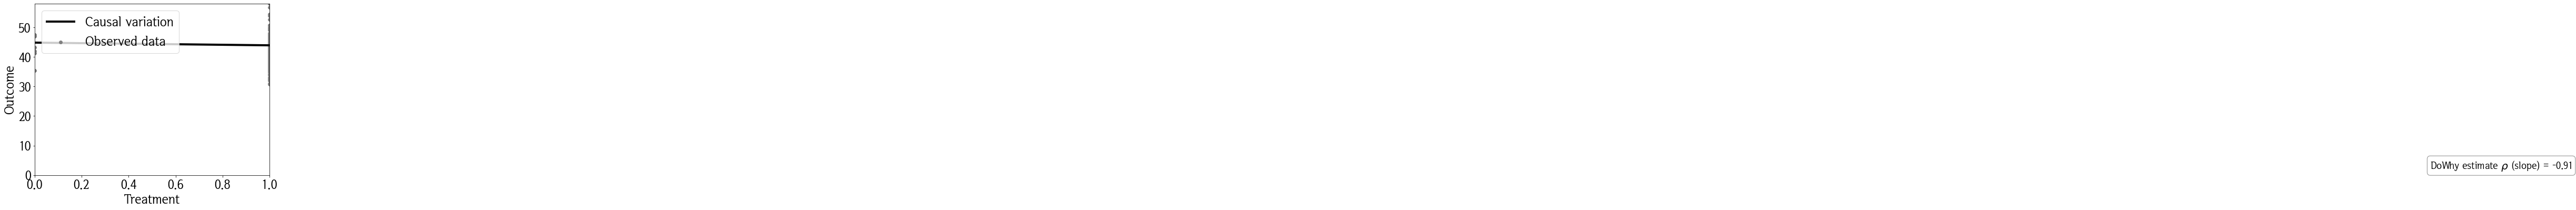

In [157]:
estimate = mass_effect.estimate_effect(mass_identified,
        method_name="backdoor.linear_regression")
# Plot Slope of line between treamtent and outcome =causal effect
dowhy.plotter.plot_causal_effect(estimate, river["is_restore"], river["미세먼지"])

In [141]:
river.columns ## Index(['Unnamed: 0', 'year', 'age', 'sex', 'consultations', 'population','perCapita', 'visits'] 
river.head()
river.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 44 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   측정소명        270 non-null    object 
 1   연도          270 non-null    int64  
 2   연도더미        270 non-null    int64  
 3   2015        270 non-null    int64  
 4   2016        270 non-null    int64  
 5   2017        270 non-null    int64  
 6   2018        270 non-null    int64  
 7   2019        270 non-null    int64  
 8   2020        270 non-null    int64  
 9   미세먼지        236 non-null    float64
 10  주거밀집도       270 non-null    float64
 11  소매          270 non-null    int64  
 12  음식          270 non-null    int64  
 13  생활서비스       270 non-null    int64  
 14  합계 범위       270 non-null    int64  
 15  교통량         264 non-null    float64
 16  1km내복원하천여부  270 non-null    int64  
 17  총녹지면적       270 non-null    int64  
 18  복원하천면적      132 non-null    float64
 19  녹지면적합계      270 non-null    i

<AxesSubplot:xlabel='연도,측정소명'>

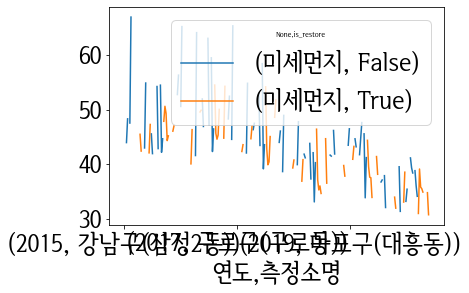

In [132]:
## 하천공사 비교

river2 = river[['연도','측정소명',  '미세먼지','is_restore']]
river2.set_index(['연도','측정소명', 'is_restore']).unstack('is_restore').plot()


In [133]:
river3 = river2.set_index(['연도','측정소명', 'is_restore']).unstack('is_restore')
river3


미세먼지           
is_restore          False      True 
연도   측정소명                           
2015 강남구(삼성2동)  45.572411        NaN
     강남대로             NaN  52.712329
     강동구(천호1동)  43.992055        NaN
     강변북로       48.347945        NaN
     강북구(번동)          NaN  41.681863
...                   ...        ...
2020 천호대로       40.767760        NaN
     청계천로             NaN  39.043716
     한강대로       41.926230        NaN
     홍릉로              NaN  34.811475
     화랑로              NaN  30.762295

[270 rows x 2 columns]

In [134]:
river3['copay'] = 0
river3['copay'] = river3.copay.where(river3.index==False, 1)
river3

미세먼지            copay
is_restore          False       True      
연도   측정소명                                 
2015 강남구(삼성2동)  45.572411        NaN     1
     강남대로             NaN  52.712329     1
     강동구(천호1동)  43.992055        NaN     1
     강변북로       48.347945        NaN     1
     강북구(번동)          NaN  41.681863     1
...                   ...        ...   ...
2020 천호대로       40.767760        NaN     1
     청계천로             NaN  39.043716     1
     한강대로       41.926230        NaN     1
     홍릉로              NaN  34.811475     1
     화랑로              NaN  30.762295     1

[270 rows x 3 columns]

In [135]:
result = river3.groupby('copay').mean()
result.columns = ['restore0', 'restore1']
result


,restore0,restore1
copay,,
1,44.882557,42.479972


In [136]:
result['restore0'] - result['restore1']

copay
1    2.402586
dtype: float64

In [137]:
(result['restore0'] - result['restore1']).diff()

copay
1   NaN
dtype: float64

In [138]:
river['copay']=0
river['copay']=river['copay'].where(river.index==False,1)
river['restore'] = np.where(river.index==False,1,0)


In [142]:
mod = smf.ols('미세먼지~restore+copay+copay*restore+연도더미+교통량+녹지면적합계+주거밀집도+평균기온+평균풍속+강수량합', data = river).fit()
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   미세먼지   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     27.80
Date:                Fri, 23 Apr 2021   Prob (F-statistic):           1.88e-29
Time:                        15:50:08   Log-Likelihood:                -667.83
No. Observations:                 225   AIC:                             1354.
Df Residuals:                     216   BIC:                             1384.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        40.6648      5.653      7.193      0.000      29.522      51.808
restore          17.8496      4.249      4.201      0.000       9.475      26.224
copay            22.8152      3.113      7.330      0.000      16.680      28.950
copay:restore -1.215e-11   1.71e-12     -7.102      0.000   -1.55e-11   -8.78e-12
연도더미             -1.4621      0.230     -6.351      0.000      -1.916      -1.008
교통량            1.536e-05   7.92e-06      1.939      0.054   -2.51e-07     3.1e-05
녹지면적합계        -3.642e-06   1.02e-06     -3.588      0.000   -5.64e-06   -1.64e-06
주거밀집도            -0.1927      0.047     -4.068      0.000      -0.286      -0.099
평균기온              0.7393      0.454      1.628      0.105      -0.156       1.635
평균풍속             -1.1052      0.927     -1.193      0.234      -2.931       0.721
강수량합             -0.0079      0.001     -5.614      0.000      -0.011      -0.005
==============================================================================
Omnibus:                       34.401   Durbin-Watson:                   1.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.329
Skew:                           0.919   Prob(JB):                     1.94e-11
Kurtosis:                       4.373   Cond. No.                     2.53e+21
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 9.11e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""